##**1. Data Cleaning**

IMPORTING THE RELEVANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Importing the necessary functions and modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Importing the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA



Matplotlib is building the font cache; this may take a moment.


In [8]:
# Load dataset and create a DataFrame
# Specify the file path of the CSV file
file_path = "D:/Document/fadhlo/zaytalnakhil/databasah_2.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame only 6 first row (use head for the first 6 rows, and tail for the last 6 rows)
df.head(6)


,Data_points,525.5073,525.9894,526.4715,526.9536,527.4357,527.9178,528.4,528.8821,529.3642,...,3099.046,3099.528,Sample Code,LEFT_Formula,Sample_Code_with_Formula,LEFT_Formula_with_SC_Formula,Province,Acummulative_rainfall_since_1_Jan_Dec_2021_Yuni_formulated,Rainfall_Group_Yuni,RG_yuni_mix
0,2.6_1A,0.089236,0.101721,0.107583,0.104697,0.093445,0.075911,0.055013,0.034083,0.016262,...,0.045899,0.046061,02-006-1A,02-006,02-006-1A,02-006,Nakhon Si Tammarat,2718.5,Group 4,4
1,2.6_2A,0.035707,0.035964,0.037096,0.038216,0.040908,0.043613,0.044568,0.045519,0.046563,...,0.073956,0.073648,02-006-2A,02-006,02-006-2A,02-006,Nakhon Si Tammarat,2718.5,Group 4,4
2,2.6_3A,0.098685,0.098417,0.092639,0.083412,0.073728,0.066074,0.061816,0.060799,0.061555,...,0.068137,0.068183,02-006-3A,02-006,02-006-3A,02-006,Nakhon Si Tammarat,2718.5,Group 4,4
3,2.6_4A,0.064316,0.064867,0.063026,0.061954,0.062276,0.062738,0.063090,0.064550,0.065881,...,0.077577,0.077502,02-006-4A,02-006,02-006-4A,02-006,Nakhon Si Tammarat,2718.5,Group 4,4
4,2.6_1A,0.089236,0.101721,0.107583,0.104697,0.093445,0.075911,0.055013,0.034083,0.016262,...,0.045899,0.046061,02-006-1A,02-006,02-006-1A,02-006,Nakhon Si Tammarat,2718.5,Group 4,4
5,3.8_1A,0.021972,0.017961,0.017733,0.019714,0.023200,0.025427,0.028783,0.032198,0.035155,...,0.031060,0.031066,03-008-1A,03-008,03-008-1A,03-008,Nakhon Si Tammarat,2718.5,Group 4,4


In [9]:
# Display the missing values in the DataFrame
df.isnull().sum()


Data_points                                                   0
525.5073                                                      0
525.9894                                                      0
526.4715                                                      0
526.9536                                                      0
                                                             ..
LEFT_Formula_with_SC_Formula                                  0
Province                                                      0
Acummulative_rainfall_since_1_Jan_Dec_2021_Yuni_formulated    0
Rainfall_Group_Yuni                                           0
RG_yuni_mix                                                   0
Length: 3627, dtype: int64

In [10]:
# Display the data types of the columns in the DataFrame
df.dtypes

Data_points                                                    object
525.5073                                                      float64
525.9894                                                      float64
526.4715                                                      float64
526.9536                                                      float64
                                                               ...   
LEFT_Formula_with_SC_Formula                                   object
Province                                                       object
Acummulative_rainfall_since_1_Jan_Dec_2021_Yuni_formulated    float64
Rainfall_Group_Yuni                                            object
RG_yuni_mix                                                     int64
Length: 3627, dtype: object

In [14]:
# Display data description
df.describe(include='all')


,Data_points,525.5073,525.9894,526.4715,526.9536,527.4357,527.9178,528.4,528.8821,529.3642,...,3099.046,3099.528,Sample Code,LEFT_Formula,Sample_Code_with_Formula,LEFT_Formula_with_SC_Formula,Province,Acummulative_rainfall_since_1_Jan_Dec_2021_Yuni_formulated,Rainfall_Group_Yuni,RG_yuni_mix
count,269,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269,269,269,269,269,269.000000,269,269.000000
unique,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,260,52,260,52,16,NaN,5,NaN
top,2.6_1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,02-006-1A,06-009,02-006-1A,06-009,Krabi,NaN,Group 2,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,11,2,11,63,NaN,91,NaN
mean,NaN,0.037738,0.037889,0.038063,0.038184,0.038210,0.038099,0.037954,0.037802,0.037695,...,0.053679,0.053663,NaN,NaN,NaN,NaN,NaN,1924.295167,NaN,2.925651
std,NaN,0.026913,0.027516,0.026978,0.025985,0.025100,0.024527,0.023769,0.023142,0.022699,...,0.024289,0.024291,NaN,NaN,NaN,NaN,NaN,761.107488,NaN,0.966825
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000700,0.000000,0.000000,...,0.006727,0.006604,NaN,NaN,NaN,NaN,NaN,969.500000,NaN,1.000000
25%,NaN,0.014305,0.015748,0.016274,0.017163,0.017362,0.017326,0.017931,0.020110,0.019843,...,0.033812,0.033723,NaN,NaN,NaN,NaN,NaN,1394.600000,NaN,2.000000
50%,NaN,0.034986,0.035141,0.035890,0.034885,0.034810,0.034648,0.036082,0.034721,0.033851,...,0.054791,0.054721,NaN,NaN,NaN,NaN,NaN,1976.000000,NaN,3.000000
75%,NaN,0.057590,0.056961,0.055977,0.054906,0.056755,0.056552,0.054584,0.052970,0.051725,...,0.069449,0.069409,NaN,NaN,NaN,NaN,NaN,2136.500000,NaN,4.000000


In [16]:
# Drop columns that are not needed
df_new = df.drop(['Data_points',
                    'Sample Code', 
                    'LEFT_Formula', 
                    'Province', 
                    'Sample_Code_with_Formula', 
                    'LEFT_Formula_with_SC_Formula', 
                    'Rainfall_Group_Yuni'],
                    axis=1)
df_new

,525.5073,525.9894,526.4715,526.9536,527.4357,527.9178,528.4,528.8821,529.3642,529.8463,...,3096.154,3096.636,3097.118,3097.6,3098.082,3098.564,3099.046,3099.528,Acummulative_rainfall_since_1_Jan_Dec_2021_Yuni_formulated,RG_yuni_mix
0,0.089236,0.101721,0.107583,0.104697,0.093445,0.075911,0.055013,0.034083,0.016262,0.004363,...,0.045484,0.045510,0.045536,0.045574,0.045642,0.045751,0.045899,0.046061,2718.5,4
1,0.035707,0.035964,0.037096,0.038216,0.040908,0.043613,0.044568,0.045519,0.046563,0.047675,...,0.075520,0.075461,0.075293,0.075028,0.074692,0.074320,0.073956,0.073648,2718.5,4
2,0.098685,0.098417,0.092639,0.083412,0.073728,0.066074,0.061816,0.060799,0.061555,0.061865,...,0.069058,0.068920,0.068744,0.068545,0.068352,0.068203,0.068137,0.068183,2718.5,4
3,0.064316,0.064867,0.063026,0.061954,0.062276,0.062738,0.063090,0.064550,0.065881,0.065645,...,0.078322,0.078228,0.078078,0.077914,0.077770,0.077660,0.077577,0.077502,2718.5,4
4,0.089236,0.101721,0.107583,0.104697,0.093445,0.075911,0.055013,0.034083,0.016262,0.004363,...,0.045484,0.045510,0.045536,0.045574,0.045642,0.045751,0.045899,0.046061,2718.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.039939,0.040777,0.038789,0.035498,0.030210,0.028826,0.026949,0.025288,0.023511,0.020996,...,0.030949,0.030886,0.030791,0.030674,0.030550,0.030437,0.030350,0.030300,5529.9,5
265,0.012959,0.028690,0.043367,0.054176,0.060135,0.061944,0.061242,0.059887,0.059198,0.059613,...,0.070656,0.070629,0.070499,0.070285,0.070021,0.069749,0.069508,0.069331,5529.9,5
266,0.068718,0.072964,0.071365,0.067697,0.062836,0.058891,0.056937,0.055841,0.054611,0.052147,...,0.047425,0.047390,0.047332,0.047262,0.047189,0.047112,0.047026,0.046928,5529.9,5
267,0.049185,0.052138,0.050455,0.046468,0.041365,0.035280,0.029439,0.025038,0.022264,0.020955,...,0.025385,0.025528,0.025653,0.025752,0.025825,0.025875,0.025907,0.025920,5529.9,5


In [17]:
# Display the values of the new DataFrame
df_new.head()

,525.5073,525.9894,526.4715,526.9536,527.4357,527.9178,528.4,528.8821,529.3642,529.8463,...,3096.154,3096.636,3097.118,3097.6,3098.082,3098.564,3099.046,3099.528,Acummulative_rainfall_since_1_Jan_Dec_2021_Yuni_formulated,RG_yuni_mix
0,0.089236,0.101721,0.107583,0.104697,0.093445,0.075911,0.055013,0.034083,0.016262,0.004363,...,0.045484,0.045510,0.045536,0.045574,0.045642,0.045751,0.045899,0.046061,2718.5,4
1,0.035707,0.035964,0.037096,0.038216,0.040908,0.043613,0.044568,0.045519,0.046563,0.047675,...,0.075520,0.075461,0.075293,0.075028,0.074692,0.074320,0.073956,0.073648,2718.5,4
2,0.098685,0.098417,0.092639,0.083412,0.073728,0.066074,0.061816,0.060799,0.061555,0.061865,...,0.069058,0.068920,0.068744,0.068545,0.068352,0.068203,0.068137,0.068183,2718.5,4
3,0.064316,0.064867,0.063026,0.061954,0.062276,0.062738,0.063090,0.064550,0.065881,0.065645,...,0.078322,0.078228,0.078078,0.077914,0.077770,0.077660,0.077577,0.077502,2718.5,4
4,0.089236,0.101721,0.107583,0.104697,0.093445,0.075911,0.055013,0.034083,0.016262,0.004363,...,0.045484,0.045510,0.045536,0.045574,0.045642,0.045751,0.045899,0.046061,2718.5,4


In [18]:
# Display data information
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Columns: 3620 entries, 525.5073 to RG_yuni_mix
dtypes: float64(3619), int64(1)
memory usage: 7.4 MB


##**2. Data Correlation**

In [20]:
# Display the number of unique values in the DataFrame
df_new.nunique()

525.5073                                                      263
525.9894                                                      253
526.4715                                                      258
526.9536                                                      265
527.4357                                                      266
                                                             ... 
3098.564                                                      267
3099.046                                                      266
3099.528                                                      266
Acummulative_rainfall_since_1_Jan_Dec_2021_Yuni_formulated     16
RG_yuni_mix                                                     5
Length: 3620, dtype: int64

In [21]:
# Display data correlation
df_new.corr()

,525.5073,525.9894,526.4715,526.9536,527.4357,527.9178,528.4,528.8821,529.3642,529.8463,...,3096.154,3096.636,3097.118,3097.6,3098.082,3098.564,3099.046,3099.528,Acummulative_rainfall_since_1_Jan_Dec_2021_Yuni_formulated,RG_yuni_mix
525.5073,1.000000,0.984850,0.951897,0.904419,0.846604,0.784231,0.722336,0.663168,0.605462,0.550810,...,-0.129419,-0.128749,-0.128141,-0.127653,-0.127315,-0.127121,-0.127040,-0.127023,0.023533,0.023534
525.9894,0.984850,1.000000,0.988601,0.954534,0.900829,0.837189,0.769013,0.700801,0.632166,0.565714,...,-0.113221,-0.112477,-0.111805,-0.111272,-0.110916,-0.110731,-0.110683,-0.110718,0.042478,0.040273
526.4715,0.951897,0.988601,1.000000,0.987058,0.948480,0.893340,0.827017,0.754591,0.677724,0.601952,...,-0.080825,-0.080071,-0.079403,-0.078894,-0.078577,-0.078443,-0.078447,-0.078523,0.054366,0.054923
526.9536,0.904419,0.954534,0.987058,1.000000,0.985375,0.947652,0.891707,0.821530,0.741037,0.659602,...,-0.036781,-0.036058,-0.035446,-0.035013,-0.034784,-0.034734,-0.034804,-0.034915,0.062074,0.069440
527.4357,0.846604,0.900829,0.948480,0.985375,1.000000,0.986897,0.948872,0.888379,0.810841,0.729266,...,-0.005358,-0.004683,-0.004157,-0.003839,-0.003737,-0.003809,-0.003974,-0.004134,0.064545,0.081379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098.564,-0.127121,-0.110731,-0.078443,-0.034734,-0.003809,0.023948,0.043525,0.051408,0.052125,0.053384,...,0.999743,0.999820,0.999892,0.999950,0.999987,1.000000,0.999987,0.999949,-0.047802,0.056206
3099.046,-0.127040,-0.110683,-0.078447,-0.034804,-0.003974,0.023714,0.043250,0.051113,0.051823,0.053074,...,0.999669,0.999745,0.999822,0.999893,0.999950,0.999987,1.000000,0.999987,-0.048210,0.055664
3099.528,-0.127023,-0.110718,-0.078523,-0.034915,-0.004134,0.023524,0.043039,0.050886,0.051586,0.052832,...,0.999602,0.999671,0.999747,0.999822,0.999892,0.999949,0.999987,1.000000,-0.048532,0.055173
Acummulative_rainfall_since_1_Jan_Dec_2021_Yuni_formulated,0.023533,0.042478,0.054366,0.062074,0.064545,0.060035,0.047689,0.032075,0.014991,-0.001125,...,-0.047247,-0.046898,-0.046830,-0.047016,-0.047374,-0.047802,-0.048210,-0.048532,1.000000,0.843796


In [23]:
# Compute the data correlation
correlation = df_new.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


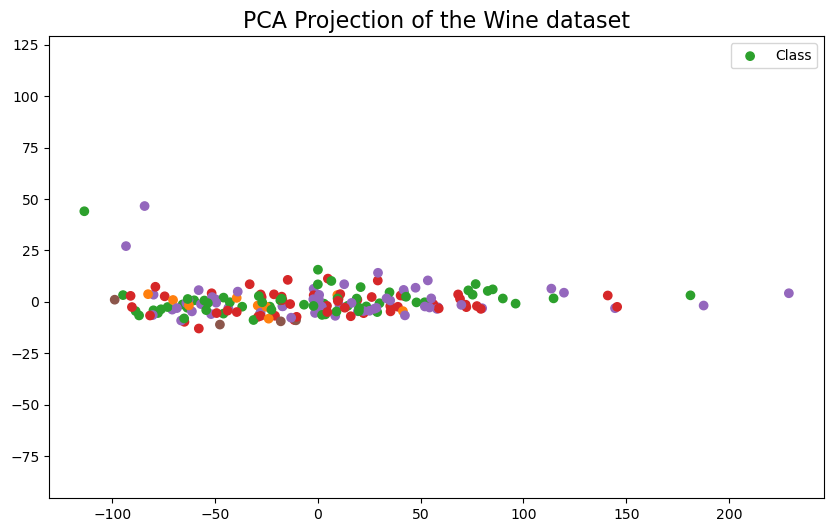

Random Forest Classifier Performance:
Accuracy: 0.42
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.36      0.50      0.42        28
           3       0.42      0.23      0.29        22
           4       0.50      0.60      0.55        25
           5       0.00      0.00      0.00         2

    accuracy                           0.42        81
   macro avg       0.26      0.27      0.25        81
weighted avg       0.39      0.42      0.39        81



c:\Users\Muhammad-PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Muhammad-PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Muhammad-PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# Splitting the dataset into training and testing sets
X = df_new.drop('RG_yuni_mix', axis=1)
y = df_new ['RG_yuni_mix']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA for feature extraction
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(X_train_scaled)

# Visualize PCA result
plt.figure(figsize=(10, 6))
plt.scatter(
    pca_embedding[:, 0],
    pca_embedding[:, 1],
    c=[sns.color_palette()[x] for x in y_train],
    label="Class")
plt.gca().set_aspect('equal', 'datalim')
plt.legend()
plt.title('PCA Projection of the Wine dataset', fontsize=16)
plt.show()

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Creating the pipeline
rf_pipeline = make_pipeline(StandardScaler(), rf_model)

# Training the model
rf_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Displaying the results
print(f"Random Forest Classifier Performance:\nAccuracy: {accuracy_rf:.2f}\nClassification Report:\n{report_rf}")

